In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [48]:
google = pd.read_csv('long_stock_data/GOOG.csv', index_col = 'Date')
microsoft = pd.read_csv('long_stock_data/MSFT.csv', index_col = 'Date')
amazon = pd.read_csv('long_stock_data/AMZN.csv', index_col = 'Date')
ibm = pd.read_csv('long_stock_data/IBM.csv', index_col = 'Date')

In [87]:
# df- dataframe pf stock prices
df = pd.read_csv('long_stock_data/MSFT.csv', index_col = 'Date')
df.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-12-03,31.71875,32.234375,30.5,30.53125,19.29249,51426800


In [50]:
df.shape

(9083, 6)

<Axes: xlabel='Date'>

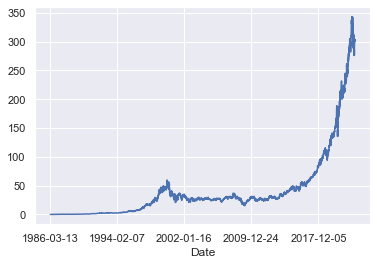

In [51]:
df['Close'].plot()

<Axes: xlabel='Date'>

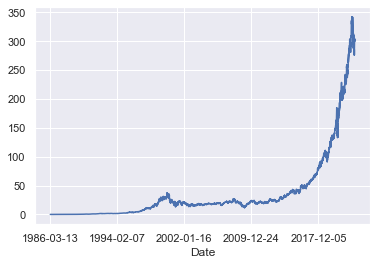

In [52]:
df['Adj Close'].plot()

In [53]:
df.isnull().values.any()

False

In [54]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,36.256120,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,59.981436,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,0.057046,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,2.575089,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,18.948530,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,29.244812,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


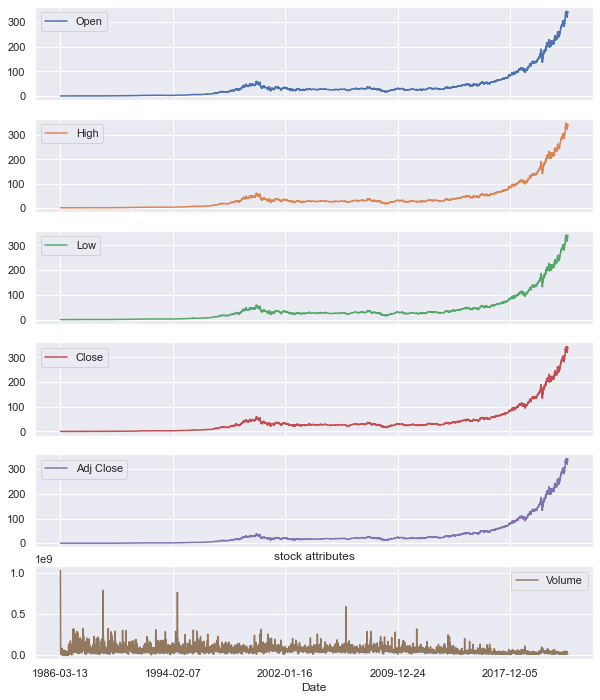

In [55]:
df['1986':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('stock attributes')
plt.show()

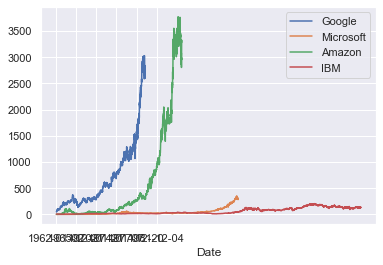

In [56]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()

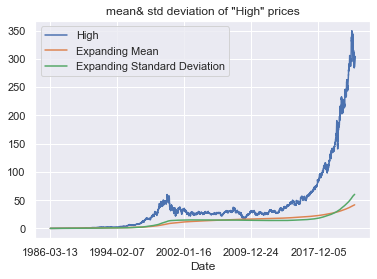

In [57]:
df_mean = df.High.expanding().mean()
df_std = df.High.expanding().std()
df.High.plot()
df_mean.plot()
df_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('mean& std deviation of "High" prices')
plt.show()

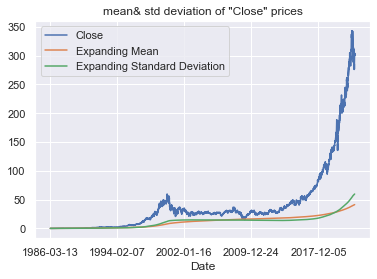

In [58]:
df_mean = df.Close.expanding().mean()
df_std = df.Close.expanding().std()
df.Close.plot()
df_mean.plot()
df_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('mean& std deviation of "Close" prices')
plt.show()

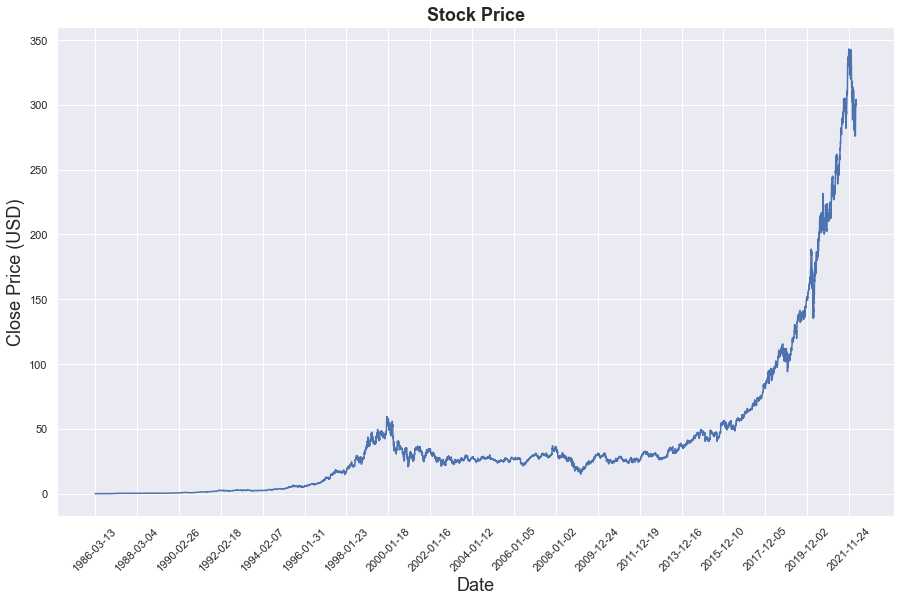

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('long_stock_data/MSFT.csv')

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(df[['Close']])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.title("Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

<Axes: xlabel='Year'>

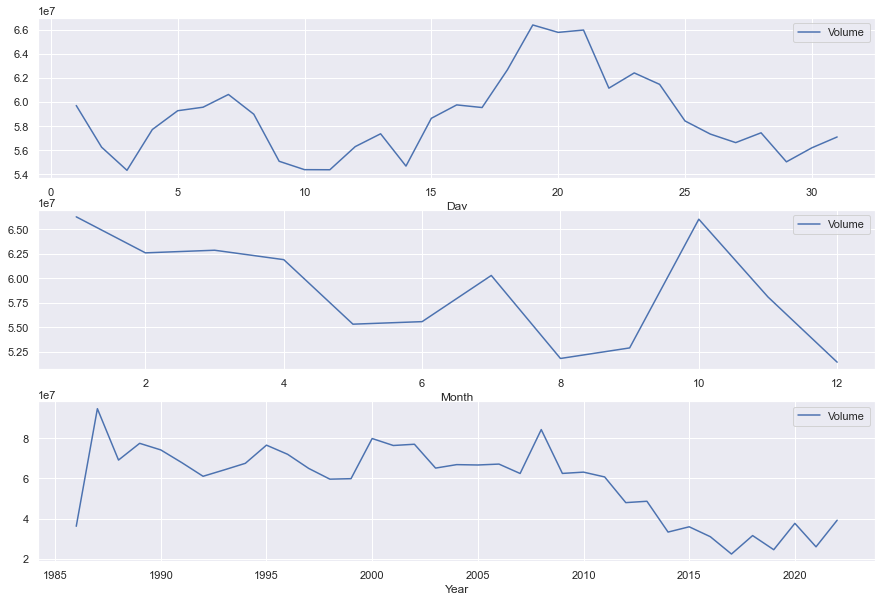

In [60]:
# Analysis of the Volume Data on Daily, Monthly, and Yearly Basis
df = pd.read_csv('long_stock_data/MSFT.csv')
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (15,10))
df.groupby(df.index.day).mean().plot(y ="Volume", ax=ax1, xlabel= "Day")
df.groupby(df.index.month).mean().plot(y ="Volume", ax=ax2, xlabel= "Month")
df.groupby(df.index.year).mean().plot(y="Volume", ax=ax3, xlabel= "Year")

<Axes: xlabel='Adj Close', ylabel='High'>

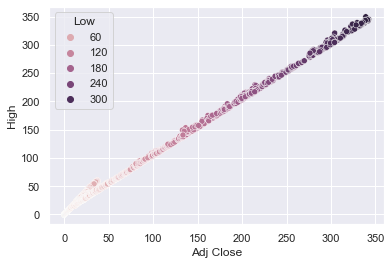

In [61]:
#By plotting "Adj Close" against "High", we can see how the adjusted closing
# prices align with the daily high prices.

sns.scatterplot(x=df["Adj Close"],y=df["High"],hue="Low",data=df)

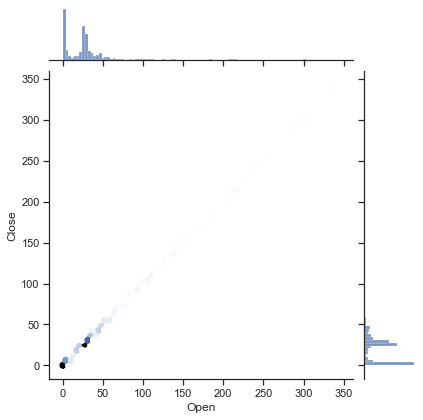

In [62]:
#This joint plot allows us to analyze the relationship between "Open" and "Close" stock prices
sns.set_theme(style="ticks")
sns.jointplot(x=df['Open'], y=df['Close'], kind="hex")

### seperate input and output variables

In [63]:
# output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target = df[['Close']]

In [64]:
df.iloc[:, 0:1]

,Open
Date,
1986-03-13,0.088542
1986-03-14,0.097222
1986-03-17,0.100694
1986-03-18,0.102431
1986-03-19,0.099826
...,...
2022-03-18,295.369995
2022-03-21,298.890015
2022-03-22,299.799988


In [65]:
# train_set = df.iloc[:, 0:1].values

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
scaled_features

array([[0.00000000e+00, 2.73157923e-05, 0.00000000e+00, 2.02437349e-05,
        1.00000000e+00],
       [2.51936359e-05, 2.97987861e-05, 2.53718474e-05, 3.03656023e-05,
        2.97096179e-01],
       [3.52710903e-05, 3.22817798e-05, 3.55205863e-05, 3.54294513e-05,
        1.27119118e-01],
       ...,
       [8.69910260e-01, 8.72217322e-01, 8.73053005e-01, 8.86158182e-01,
        2.45712224e-02],
       [8.71971094e-01, 8.67154105e-01, 8.69983865e-01, 8.72835309e-01,
        2.27408894e-02],
       [8.67994694e-01, 8.69928882e-01, 8.71737697e-01, 8.86274817e-01,
        2.15087197e-02]])

In [67]:
# create sequences

def create_sequences(features, time_steps=60):
    Xs, ys = [], []
    #Xs will store the sequences of feature data.
    for i in range(len(features) - time_steps):
        Xs.append(features[i:i+time_steps])
        ys.append(features[i+time_steps, 3])
    return np.array(Xs), np.array(ys)
                

# X[i:i+time_steps] creates a sequence of time_steps length from the feature data.
# y.iloc[i+time_steps] gets the target value corresponding to the end of the sequence. 
# The sequence and the target value are appended to Xs and ys, respectively.

In [68]:
time_steps=60
# X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
# X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

X, y = create_sequences(scaled_features, time_steps)

In [69]:
X.shape

(9023, 60, 5)

### train and test set

In [70]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [71]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7218, 60, 5)
X_test shape: (1805, 60, 5)
y_train shape: (7218,)
y_test shape: (1805,)


In [72]:
y_train

array([0.00737425, 0.68771479, 0.62494873, ..., 0.08769094, 0.00139184,
       0.12136248])

In [73]:
# X_train_seq.shape

In [74]:
# X_train_seq.shape[1]

In [75]:
# y_train_seq.shape

In [76]:
# X_test_seq.shape

In [79]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
203/203 [==============================] - 23s 79ms/step - loss: 0.0011 - val_loss: 1.2587e-04
Epoch 2/100
203/203 [==============================] - 15s 74ms/step - loss: 5.1959e-04 - val_loss: 4.7945e-05
Epoch 3/100
203/203 [==============================] - 15s 74ms/step - loss: 4.7678e-04 - val_loss: 8.7225e-05
Epoch 4/100
203/203 [==============================] - 15s 75ms/step - loss: 5.0508e-04 - val_loss: 1.5106e-04
Epoch 5/100
203/203 [==============================] - 15s 74ms/step - loss: 4.3992e-04 - val_loss: 5.2513e-05
Epoch 6/100
203/203 [==============================] - 15s 73ms/step - loss: 3.2177e-04 - val_loss: 1.0503e-04
Epoch 7/100
203/203 [==============================] - 15s 73ms/step - loss: 4.1441e-04 - val_loss: 1.4619e-04
Epoch 8/100
203/203 [==============================] - 15s 72ms/step - loss: 3.6168e-04 - val_loss: 5.3588e-05
Epoch 9/100
203/203 [==============================] - 14s 71ms/step - loss: 3.7248e-04 - val_loss: 8.5713e-05
Epoch

203/203 [==============================] - 15s 73ms/step - loss: 2.2371e-04 - val_loss: 7.1264e-05
Epoch 75/100
203/203 [==============================] - 15s 73ms/step - loss: 2.2741e-04 - val_loss: 1.8574e-04
Epoch 76/100
203/203 [==============================] - 15s 75ms/step - loss: 2.3666e-04 - val_loss: 4.8142e-05
Epoch 77/100
203/203 [==============================] - 15s 75ms/step - loss: 2.4097e-04 - val_loss: 7.8448e-05
Epoch 78/100
203/203 [==============================] - 15s 76ms/step - loss: 2.3680e-04 - val_loss: 3.1729e-05
Epoch 79/100
203/203 [==============================] - 15s 76ms/step - loss: 2.4297e-04 - val_loss: 4.1583e-05
Epoch 80/100
203/203 [==============================] - 15s 75ms/step - loss: 2.3252e-04 - val_loss: 8.8458e-05
Epoch 81/100
203/203 [==============================] - 16s 77ms/step - loss: 2.5502e-04 - val_loss: 2.8955e-05
Epoch 82/100
203/203 [==============================] - 16s 77ms/step - loss: 2.8023e-04 - val_loss: 3.9113e-05
Epoch

In [81]:
loss = model.evaluate(X_test, y_test)
loss

57/57 [==============================] - 2s 32ms/step - loss: 4.1740e-05


4.1740389860933647e-05

In [82]:
y_pred = model.predict(X_test)

57/57 [==============================] - 5s 31ms/step


In [83]:
import math

from sklearn.metrics import mean_squared_error
# print(math.sqrt(mean_squared_error(y_train_seq, train_predict)))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

0.006460679602446785


In [84]:
# Inverse transform predictions and true values to original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 3)), y_test.reshape(-1, 1), np.zeros((len(y_test), 1))), axis=1))[:, 3]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 3)), y_pred, np.zeros((len(y_pred), 1))), axis=1))[:, 3]


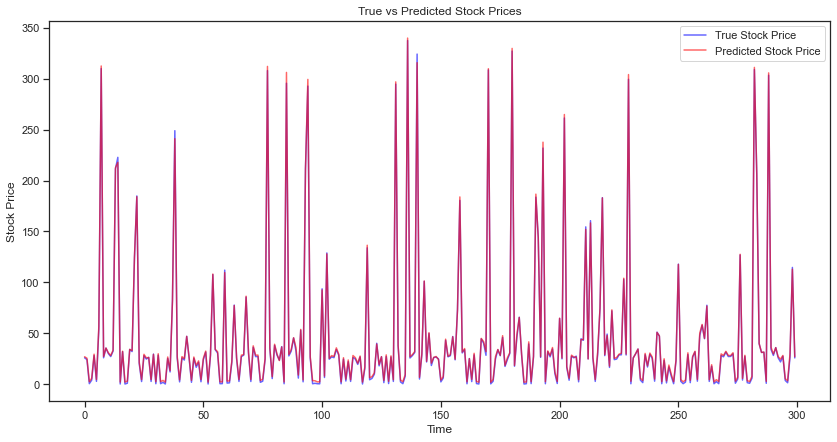

In [85]:
# Plotting true vs predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled[-300:], color='blue', label='True Stock Price', alpha=0.6)
plt.plot(y_pred_scaled[-300:], color='red', label='Predicted Stock Price', alpha=0.6)
plt.title('True vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

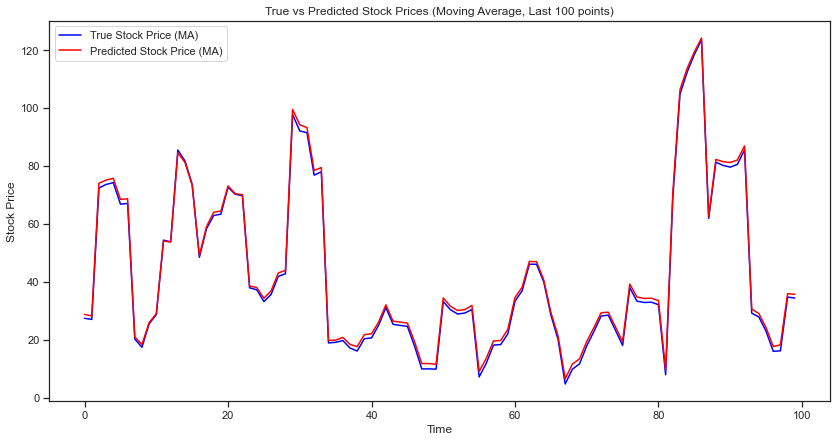

Mean Absolute Error (MAE): 1.5782


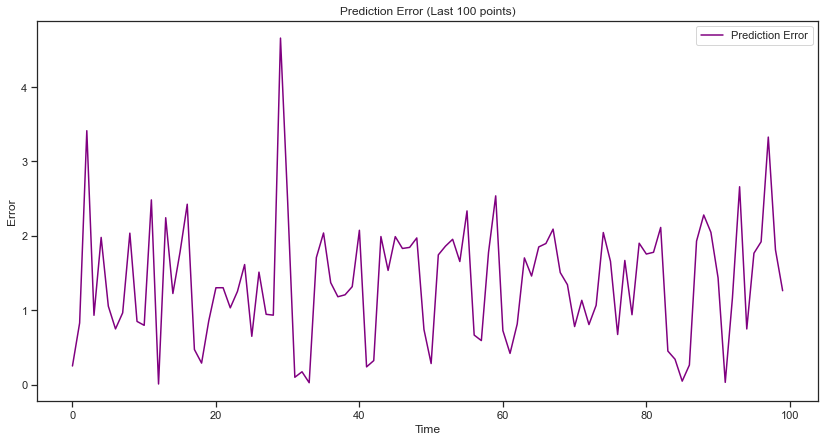

In [86]:
# Calculate and plot moving averages to smooth the curves
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

y_test_ma = moving_average(y_test_scaled, window_size=5)
y_pred_ma = moving_average(y_pred_scaled, window_size=5)

plt.figure(figsize=(14, 7))
plt.plot(y_test_ma[-100:], color='blue', label='True Stock Price (MA)')
plt.plot(y_pred_ma[-100:], color='red', label='Predicted Stock Price (MA)')
plt.title('True vs Predicted Stock Prices (Moving Average, Last 100 points)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test_scaled - y_pred_scaled))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plotting the error
errors = np.abs(y_test_scaled - y_pred_scaled)
plt.figure(figsize=(14, 7))
plt.plot(errors[-100:], color='purple', label='Prediction Error')
plt.title('Prediction Error (Last 100 points)')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()